          T           P        vf           vfg          vg           uf  \
0     0.010    0.006102  0.001000  2.065326e+02  206.533627     0.000000   
1     4.000    0.008116  0.001000  1.575305e+02  157.531546    16.770141   
2     5.000    0.008704  0.001000  1.473998e+02  147.400772    20.974982   
3     6.000    0.009331  0.001000  1.379966e+02  137.997612    25.179712   
4     8.000    0.010704  0.001000  1.211489e+02  121.149900    33.587684   
..      ...         ...       ...           ...         ...          ...   
69  370.000  210.174778  0.002217  2.746754e-03    0.004964  1844.870691   
70  371.000  212.710748  0.002285  2.425813e-03    0.004711  1863.649757   
71  372.000  215.280450  0.002376  2.047036e-03    0.004424  1886.671146   
72  373.000  217.886235  0.002520  1.546784e-03    0.004066  1918.677969   
73  374.136  220.890000  0.003256  1.824467e-09    0.003256  2044.659183   

            ufg           ug           hf          hfg           hg        sf  \
0   23

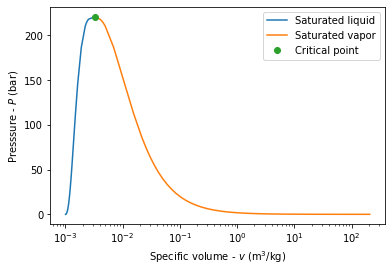

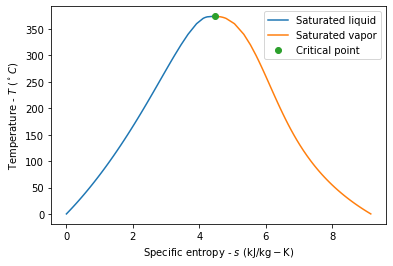

In [1]:
"""
This example generates a saturated steam table and plots the vapor dome. The
steam table corresponds to data typically found in thermodynamic text books
and uses the same customary units.

Requires: Cantera >= 2.5.0, matplotlib >= 2.0, pandas >= 1.1.0, numpy >= 1.12
"""

import cantera as ct
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

w = ct.Water()

# create colums
columns = ['T', 'P',
           'vf', 'vfg', 'vg',
           'uf', 'ufg', 'ug',
           'hf', 'hfg', 'hg',
           'sf', 'sfg', 'sg']

# temperatures correspond to Engineering Thermodynamics, Moran et al. (9th ed),
# Table A-2; additional data points are added close to the critical point;
# w.min_temp is equal to the triple point temperature
degc = np.hstack([np.array([w.min_temp - 273.15, 4, 5, 6, 8]),
                  np.arange(10, 37), np.array([38]),
                  np.arange(40, 100, 5), np.arange(100, 300, 10),
                  np.arange(300, 380, 20), np.arange(370, 374),
                  np.array([w.critical_temperature - 273.15])])

df = pd.DataFrame(0, index=np.arange(len(degc)), columns=columns)
df.T = degc

arr = ct.SolutionArray(w, len(degc))

# saturated vapor data
arr.TQ = degc + 273.15, 1
df.P = arr.P_sat / 1.e5
df.vg = arr.v
df.ug = arr.int_energy_mass / 1.e3
df.hg = arr.enthalpy_mass / 1.e3
df.sg = arr.entropy_mass / 1.e3

# saturated liquid data
arr.TQ = degc + 273.15, 0
df.vf = arr.v
df.uf = arr.int_energy_mass / 1.e3
df.hf = arr.enthalpy_mass / 1.e3
df.sf = arr.entropy_mass / 1.e3

# delta values
df.vfg = df.vg - df.vf
df.ufg = df.ug - df.uf
df.hfg = df.hg - df.hf
df.sfg = df.sg - df.sf

# reference state (triple point; liquid state)
w.TQ = w.min_temp, 0
uf0 = w.int_energy_mass / 1.e3
hf0 = w.enthalpy_mass / 1.e3
sf0 = w.entropy_mass / 1.e3
pv0 = w.P * w.v / 1.e3

# change reference state
df.ug -= uf0
df.uf -= uf0
df.hg -= hf0 - pv0
df.hf -= hf0 - pv0
df.sg -= sf0
df.sf -= sf0

# print and write saturated steam table to csv file
print(df)
df.to_csv('saturated_steam_T.csv', index=False)

# illustrate the vapor dome in a P-v diagram
plt.semilogx(df.vf.values, df.P.values, label='Saturated liquid')
plt.semilogx(df.vg.values, df.P.values, label='Saturated vapor')
plt.semilogx(df.vg.values[-1], df.P.values[-1], 'o', label='Critical point')
plt.xlabel(r'Specific volume - $v$ ($\mathrm{m^3/kg}$)')
plt.ylabel(r'Presssure - $P$ (bar)')
plt.legend()

# illustrate the vapor dome in a T-s diagram
plt.figure()
plt.plot(df.sf.values, df['T'].values, label='Saturated liquid')
plt.plot(df.sg.values, df['T'].values, label='Saturated vapor')
plt.plot(df.sg.values[-1], df['T'].values[-1], 'o', label='Critical point')
plt.xlabel(r'Specific entropy - $s$ ($\mathrm{kJ/kg-K}$)')
plt.ylabel(r'Temperature - $T$ (${}^\circ C$)')
plt.legend()

plt.show()

In [3]:
df.shape

(74, 14)

In [4]:
df.isnull().sum()

T      0
P      0
vf     0
vfg    0
vg     0
uf     0
ufg    0
ug     0
hf     0
hfg    0
hg     0
sf     0
sfg    0
sg     0
dtype: int64

In [8]:
vol_esp = df['vf'].unique()
vol_esp

array([0.00100023, 0.00100012, 0.00100012, 0.00100014, 0.00100022,
       0.00100036, 0.00100044, 0.00100054, 0.00100066, 0.00100078,
       0.00100092, 0.00100107, 0.00100123, 0.0010014 , 0.00100159,
       0.00100178, 0.00100199, 0.00100221, 0.00100244, 0.00100268,
       0.00100293, 0.00100319, 0.00100346, 0.00100375, 0.00100404,
       0.00100434, 0.00100465, 0.00100497, 0.00100529, 0.00100563,
       0.00100598, 0.00100633, 0.00100707, 0.00100784, 0.00100989,
       0.00101214, 0.00101457, 0.00101716, 0.00101992, 0.00102284,
       0.00102591, 0.00102913, 0.0010325 , 0.00103602, 0.00103969,
       0.00104351, 0.00105161, 0.00106033, 0.0010697 , 0.00107974,
       0.00109049, 0.00110198, 0.00111426, 0.0011274 , 0.00114144,
       0.00115649, 0.00117263, 0.00119001, 0.00120876, 0.0012291 ,
       0.00125125, 0.00127553, 0.00130231, 0.00133211, 0.00136557,
       0.00140358, 0.00149881, 0.00163795, 0.00189315, 0.00221704,
       0.00228502, 0.00237648, 0.00251953, 0.00325591])

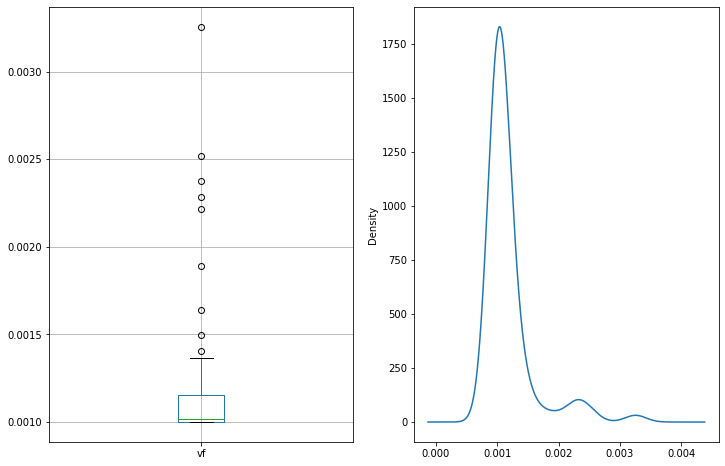

In [13]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12,8))
plt.subplot(1,2,1)
df.boxplot('vf')
plt.subplot(1,2,2)
df['vf'].plot.kde()
plt.show()

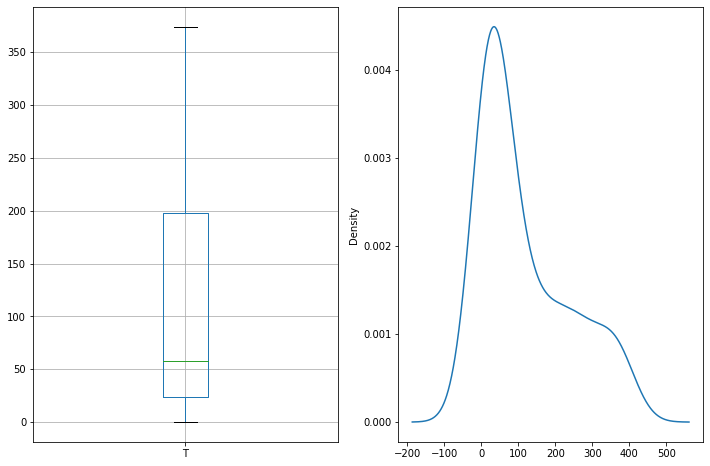

In [14]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12,8))
plt.subplot(1,2,1)
df.boxplot('T')
plt.subplot(1,2,2)
df['T'].plot.kde()
plt.show()

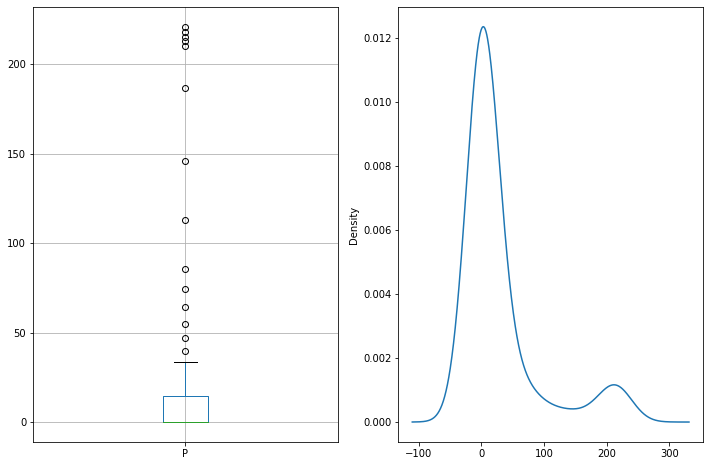

In [18]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12,8))
plt.subplot(1,2,1)
df.boxplot('P')
plt.subplot(1,2,2)
df['P'].plot.kde()
plt.show()

In [20]:
df['T']

0       0.010
1       4.000
2       5.000
3       6.000
4       8.000
       ...   
69    370.000
70    371.000
71    372.000
72    373.000
73    374.136
Name: T, Length: 74, dtype: float64

In [22]:
df_corr = df[['T', 'P', 'vf', 'vfg', 'vg', 'uf', 'ufg','ug','hf','hfg','hg','sf','sfg','sg']].corr()
df_corr

,T,P,vf,vfg,vg,uf,ufg,ug,hf,hfg,hg,sf,sfg,sg
T,1.000000,0.852784,0.801486,-0.603963,-0.603957,0.994322,-0.958220,0.020021,0.992748,-0.940351,0.059425,0.998287,-0.994816,-0.989180
P,0.852784,1.000000,0.955799,-0.331741,-0.331733,0.899725,-0.960822,-0.491748,0.905204,-0.973680,-0.459738,0.846579,-0.829919,-0.811787
vf,0.801486,0.955799,1.000000,-0.326567,-0.326559,0.859855,-0.933951,-0.555365,0.866697,-0.950188,-0.519434,0.807636,-0.794834,-0.780547
vfg,-0.603963,-0.331741,-0.326567,1.000000,1.000000,-0.570924,0.491536,-0.330472,-0.566078,0.462451,-0.359908,-0.631394,0.661850,0.690067
vg,-0.603957,-0.331733,-0.326559,1.000000,1.000000,-0.570918,0.491529,-0.330478,-0.566071,0.462443,-0.359913,-0.631389,0.661845,0.690062
uf,0.994322,0.899725,0.859855,-0.570924,-0.570918,1.000000,-0.983070,-0.085234,0.999903,-0.970969,-0.045538,0.993485,-0.988066,-0.980544
ufg,-0.958220,-0.960822,-0.933951,0.491536,0.491529,-0.983070,1.000000,0.266355,-0.985504,0.998355,0.227764,-0.957613,0.948324,0.937116
ug,0.020021,-0.491748,-0.555365,-0.330472,-0.330478,-0.085234,0.266355,1.000000,-0.098976,0.321070,0.998978,0.018923,-0.040930,-0.062307
hf,0.992748,0.905204,0.866697,-0.566078,-0.566071,0.999903,-0.985504,-0.098976,1.000000,-0.974171,-0.059285,0.992009,-0.986334,-0.978566
hfg,-0.940351,-0.973680,-0.950188,0.462451,0.462443,-0.970969,0.998355,0.321070,-0.974171,1.000000,0.283168,-0.939642,0.929107,0.916728


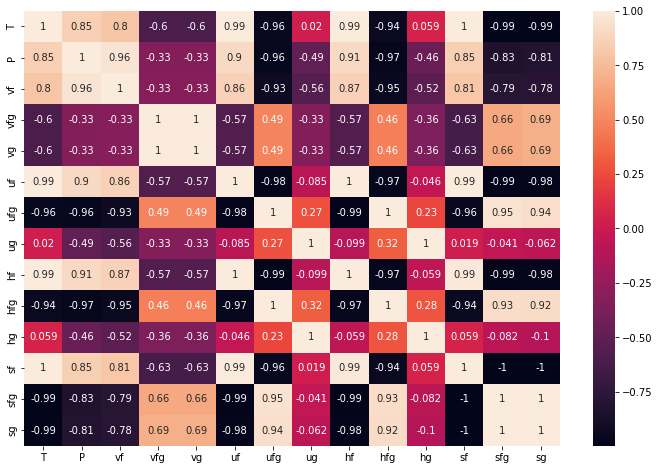

In [24]:
import seaborn as sns
fig, ax = plt.subplots(figsize=(12, 8))
sns.heatmap(df_corr, annot=True)
plt.show()

In [95]:
#features = df.drop('vf', axis =1)
features = df[['T','P']]
target = df[['vf']]

In [96]:
features.columns

Index(['T', 'P'], dtype='object')

In [97]:
features.sample(5)

,T,P
1,4.0,0.008116
52,170.0,7.908972
50,150.0,4.753921
43,90.0,0.700424
10,15.0,0.017016


In [98]:
target.columns

Index(['vf'], dtype='object')

In [99]:
target.sample(5)

,vf
47,0.001060
70,0.002285
17,0.001002
29,0.001006
57,0.001190


In [100]:
from sklearn.preprocessing import StandardScaler
standardScaler = StandardScaler()
scaled_features = pd.DataFrame(standardScaler.fit_transform(features), 
                                columns=features.columns,
                                index=features.index)
scaled_features.describe().T

,count,mean,std,min,25%,50%,75%,max
T,74.0,-7.801567e-17,1.006826,-0.977342,-0.781249,-0.492256,0.689028,2.179436
P,74.0,-3.600723e-17,1.006826,-0.461280,-0.460909,-0.458434,-0.216952,3.192754


In [101]:
from sklearn.model_selection import train_test_split
x_train, x_test ,y_train, y_test = train_test_split(scaled_features, target, test_size=0.2, random_state=1)

In [134]:
### from sklearn.neural_network import MLPRegressor
m = MLPRegressor(hidden_layer_sizes={20,10}, activation='relu', solver='adam', verbose='True', max_iter= 20000, tol=1e-20)
m.fit(x_train, y_train)

C:\Users\55839\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1599: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Iteration 1, loss = 0.42377293
Iteration 2, loss = 0.40005980
Iteration 3, loss = 0.37703571
Iteration 4, loss = 0.35473595
Iteration 5, loss = 0.33315723
Iteration 6, loss = 0.31238034
Iteration 7, loss = 0.29239651
Iteration 8, loss = 0.27318737
Iteration 9, loss = 0.25478471
Iteration 10, loss = 0.23718417
Iteration 11, loss = 0.22036891
Iteration 12, loss = 0.20429894
Iteration 13, loss = 0.18901287
Iteration 14, loss = 0.17449256
Iteration 15, loss = 0.16078858
Iteration 16, loss = 0.14817330
Iteration 17, loss = 0.13641891
Iteration 18, loss = 0.12537349
Iteration 19, loss = 0.11498183
Iteration 20, loss = 0.10522398
Iteration 21, loss = 0.09608281
Iteration 22, loss = 0.08761256
Iteration 23, loss = 0.07969228
Iteration 24, loss = 0.07231594
Iteration 25, loss = 0.06546206
Iteration 26, loss = 0.05910655
Iteration 27, loss = 0.05322426
Iteration 28, loss = 0.04779800
Iteration 29, loss = 0.04280894
Iteration 30, loss = 0.03823294
Iteration 31, loss = 0.03404716
Iteration 32, los

Iteration 413, loss = 0.00007888
Iteration 414, loss = 0.00007867
Iteration 415, loss = 0.00007846
Iteration 416, loss = 0.00007826
Iteration 417, loss = 0.00007805
Iteration 418, loss = 0.00007785
Iteration 419, loss = 0.00007764
Iteration 420, loss = 0.00007744
Iteration 421, loss = 0.00007724
Iteration 422, loss = 0.00007704
Iteration 423, loss = 0.00007685
Iteration 424, loss = 0.00007665
Iteration 425, loss = 0.00007645
Iteration 426, loss = 0.00007626
Iteration 427, loss = 0.00007607
Iteration 428, loss = 0.00007588
Iteration 429, loss = 0.00007569
Iteration 430, loss = 0.00007550
Iteration 431, loss = 0.00007532
Iteration 432, loss = 0.00007513
Iteration 433, loss = 0.00007495
Iteration 434, loss = 0.00007477
Iteration 435, loss = 0.00007459
Iteration 436, loss = 0.00007441
Iteration 437, loss = 0.00007423
Iteration 438, loss = 0.00007405
Iteration 439, loss = 0.00007388
Iteration 440, loss = 0.00007370
Iteration 441, loss = 0.00007353
Iteration 442, loss = 0.00007336
Iteration 

Iteration 913, loss = 0.00002737
Iteration 914, loss = 0.00002734
Iteration 915, loss = 0.00002731
Iteration 916, loss = 0.00002728
Iteration 917, loss = 0.00002724
Iteration 918, loss = 0.00002721
Iteration 919, loss = 0.00002718
Iteration 920, loss = 0.00002715
Iteration 921, loss = 0.00002712
Iteration 922, loss = 0.00002709
Iteration 923, loss = 0.00002706
Iteration 924, loss = 0.00002703
Iteration 925, loss = 0.00002700
Iteration 926, loss = 0.00002697
Iteration 927, loss = 0.00002694
Iteration 928, loss = 0.00002691
Iteration 929, loss = 0.00002688
Iteration 930, loss = 0.00002686
Iteration 931, loss = 0.00002683
Iteration 932, loss = 0.00002680
Iteration 933, loss = 0.00002677
Iteration 934, loss = 0.00002674
Iteration 935, loss = 0.00002672
Iteration 936, loss = 0.00002669
Iteration 937, loss = 0.00002666
Iteration 938, loss = 0.00002664
Iteration 939, loss = 0.00002661
Iteration 940, loss = 0.00002658
Iteration 941, loss = 0.00002656
Iteration 942, loss = 0.00002653
Iteration 

Iteration 1344, loss = 0.00002090
Iteration 1345, loss = 0.00002089
Iteration 1346, loss = 0.00002088
Iteration 1347, loss = 0.00002087
Iteration 1348, loss = 0.00002087
Iteration 1349, loss = 0.00002086
Iteration 1350, loss = 0.00002085
Iteration 1351, loss = 0.00002084
Iteration 1352, loss = 0.00002084
Iteration 1353, loss = 0.00002083
Iteration 1354, loss = 0.00002082
Iteration 1355, loss = 0.00002081
Iteration 1356, loss = 0.00002081
Iteration 1357, loss = 0.00002080
Iteration 1358, loss = 0.00002079
Iteration 1359, loss = 0.00002078
Iteration 1360, loss = 0.00002078
Iteration 1361, loss = 0.00002077
Iteration 1362, loss = 0.00002076
Iteration 1363, loss = 0.00002075
Iteration 1364, loss = 0.00002075
Iteration 1365, loss = 0.00002074
Iteration 1366, loss = 0.00002073
Iteration 1367, loss = 0.00002072
Iteration 1368, loss = 0.00002072
Iteration 1369, loss = 0.00002071
Iteration 1370, loss = 0.00002070
Iteration 1371, loss = 0.00002069
Iteration 1372, loss = 0.00002069
Iteration 1373

Iteration 1720, loss = 0.00001863
Iteration 1721, loss = 0.00001862
Iteration 1722, loss = 0.00001862
Iteration 1723, loss = 0.00001861
Iteration 1724, loss = 0.00001861
Iteration 1725, loss = 0.00001860
Iteration 1726, loss = 0.00001860
Iteration 1727, loss = 0.00001859
Iteration 1728, loss = 0.00001859
Iteration 1729, loss = 0.00001858
Iteration 1730, loss = 0.00001858
Iteration 1731, loss = 0.00001857
Iteration 1732, loss = 0.00001857
Iteration 1733, loss = 0.00001856
Iteration 1734, loss = 0.00001856
Iteration 1735, loss = 0.00001855
Iteration 1736, loss = 0.00001855
Iteration 1737, loss = 0.00001854
Iteration 1738, loss = 0.00001854
Iteration 1739, loss = 0.00001853
Iteration 1740, loss = 0.00001853
Iteration 1741, loss = 0.00001852
Iteration 1742, loss = 0.00001852
Iteration 1743, loss = 0.00001851
Iteration 1744, loss = 0.00001851
Iteration 1745, loss = 0.00001850
Iteration 1746, loss = 0.00001850
Iteration 1747, loss = 0.00001849
Iteration 1748, loss = 0.00001849
Iteration 1749

Iteration 2206, loss = 0.00001642
Iteration 2207, loss = 0.00001641
Iteration 2208, loss = 0.00001641
Iteration 2209, loss = 0.00001641
Iteration 2210, loss = 0.00001640
Iteration 2211, loss = 0.00001640
Iteration 2212, loss = 0.00001639
Iteration 2213, loss = 0.00001639
Iteration 2214, loss = 0.00001639
Iteration 2215, loss = 0.00001638
Iteration 2216, loss = 0.00001638
Iteration 2217, loss = 0.00001637
Iteration 2218, loss = 0.00001637
Iteration 2219, loss = 0.00001636
Iteration 2220, loss = 0.00001636
Iteration 2221, loss = 0.00001636
Iteration 2222, loss = 0.00001635
Iteration 2223, loss = 0.00001635
Iteration 2224, loss = 0.00001634
Iteration 2225, loss = 0.00001634
Iteration 2226, loss = 0.00001634
Iteration 2227, loss = 0.00001633
Iteration 2228, loss = 0.00001633
Iteration 2229, loss = 0.00001632
Iteration 2230, loss = 0.00001632
Iteration 2231, loss = 0.00001632
Iteration 2232, loss = 0.00001631
Iteration 2233, loss = 0.00001631
Iteration 2234, loss = 0.00001630
Iteration 2235

Iteration 2603, loss = 0.00001485
Iteration 2604, loss = 0.00001484
Iteration 2605, loss = 0.00001484
Iteration 2606, loss = 0.00001484
Iteration 2607, loss = 0.00001483
Iteration 2608, loss = 0.00001483
Iteration 2609, loss = 0.00001482
Iteration 2610, loss = 0.00001482
Iteration 2611, loss = 0.00001482
Iteration 2612, loss = 0.00001481
Iteration 2613, loss = 0.00001481
Iteration 2614, loss = 0.00001481
Iteration 2615, loss = 0.00001480
Iteration 2616, loss = 0.00001480
Iteration 2617, loss = 0.00001479
Iteration 2618, loss = 0.00001479
Iteration 2619, loss = 0.00001479
Iteration 2620, loss = 0.00001478
Iteration 2621, loss = 0.00001478
Iteration 2622, loss = 0.00001478
Iteration 2623, loss = 0.00001477
Iteration 2624, loss = 0.00001477
Iteration 2625, loss = 0.00001476
Iteration 2626, loss = 0.00001476
Iteration 2627, loss = 0.00001476
Iteration 2628, loss = 0.00001475
Iteration 2629, loss = 0.00001475
Iteration 2630, loss = 0.00001475
Iteration 2631, loss = 0.00001474
Iteration 2632

Iteration 3024, loss = 0.00001339
Iteration 3025, loss = 0.00001338
Iteration 3026, loss = 0.00001338
Iteration 3027, loss = 0.00001338
Iteration 3028, loss = 0.00001337
Iteration 3029, loss = 0.00001337
Iteration 3030, loss = 0.00001337
Iteration 3031, loss = 0.00001337
Iteration 3032, loss = 0.00001336
Iteration 3033, loss = 0.00001336
Iteration 3034, loss = 0.00001336
Iteration 3035, loss = 0.00001335
Iteration 3036, loss = 0.00001335
Iteration 3037, loss = 0.00001335
Iteration 3038, loss = 0.00001334
Iteration 3039, loss = 0.00001334
Iteration 3040, loss = 0.00001334
Iteration 3041, loss = 0.00001333
Iteration 3042, loss = 0.00001333
Iteration 3043, loss = 0.00001333
Iteration 3044, loss = 0.00001332
Iteration 3045, loss = 0.00001332
Iteration 3046, loss = 0.00001332
Iteration 3047, loss = 0.00001331
Iteration 3048, loss = 0.00001331
Iteration 3049, loss = 0.00001331
Iteration 3050, loss = 0.00001331
Iteration 3051, loss = 0.00001330
Iteration 3052, loss = 0.00001330
Iteration 3053

Iteration 3522, loss = 0.00001200
Iteration 3523, loss = 0.00001200
Iteration 3524, loss = 0.00001200
Iteration 3525, loss = 0.00001200
Iteration 3526, loss = 0.00001199
Iteration 3527, loss = 0.00001199
Iteration 3528, loss = 0.00001199
Iteration 3529, loss = 0.00001199
Iteration 3530, loss = 0.00001199
Iteration 3531, loss = 0.00001198
Iteration 3532, loss = 0.00001198
Iteration 3533, loss = 0.00001198
Iteration 3534, loss = 0.00001198
Iteration 3535, loss = 0.00001197
Iteration 3536, loss = 0.00001197
Iteration 3537, loss = 0.00001197
Iteration 3538, loss = 0.00001197
Iteration 3539, loss = 0.00001196
Iteration 3540, loss = 0.00001196
Iteration 3541, loss = 0.00001196
Iteration 3542, loss = 0.00001196
Iteration 3543, loss = 0.00001195
Iteration 3544, loss = 0.00001195
Iteration 3545, loss = 0.00001195
Iteration 3546, loss = 0.00001195
Iteration 3547, loss = 0.00001195
Iteration 3548, loss = 0.00001194
Iteration 3549, loss = 0.00001194
Iteration 3550, loss = 0.00001194
Iteration 3551

Iteration 3780, loss = 0.00001145
Iteration 3781, loss = 0.00001145
Iteration 3782, loss = 0.00001144
Iteration 3783, loss = 0.00001144
Iteration 3784, loss = 0.00001144
Iteration 3785, loss = 0.00001144
Iteration 3786, loss = 0.00001144
Iteration 3787, loss = 0.00001144
Iteration 3788, loss = 0.00001143
Iteration 3789, loss = 0.00001143
Iteration 3790, loss = 0.00001143
Iteration 3791, loss = 0.00001143
Iteration 3792, loss = 0.00001143
Iteration 3793, loss = 0.00001142
Iteration 3794, loss = 0.00001142
Iteration 3795, loss = 0.00001142
Iteration 3796, loss = 0.00001142
Iteration 3797, loss = 0.00001142
Iteration 3798, loss = 0.00001141
Iteration 3799, loss = 0.00001141
Iteration 3800, loss = 0.00001141
Iteration 3801, loss = 0.00001141
Iteration 3802, loss = 0.00001141
Iteration 3803, loss = 0.00001140
Iteration 3804, loss = 0.00001140
Iteration 3805, loss = 0.00001140
Iteration 3806, loss = 0.00001140
Iteration 3807, loss = 0.00001140
Iteration 3808, loss = 0.00001140
Iteration 3809

Iteration 4026, loss = 0.00001102
Iteration 4027, loss = 0.00001102
Iteration 4028, loss = 0.00001102
Iteration 4029, loss = 0.00001102
Iteration 4030, loss = 0.00001102
Iteration 4031, loss = 0.00001102
Iteration 4032, loss = 0.00001102
Iteration 4033, loss = 0.00001101
Iteration 4034, loss = 0.00001101
Iteration 4035, loss = 0.00001101
Iteration 4036, loss = 0.00001101
Iteration 4037, loss = 0.00001101
Iteration 4038, loss = 0.00001101
Iteration 4039, loss = 0.00001100
Iteration 4040, loss = 0.00001100
Iteration 4041, loss = 0.00001100
Iteration 4042, loss = 0.00001100
Iteration 4043, loss = 0.00001100
Iteration 4044, loss = 0.00001100
Iteration 4045, loss = 0.00001100
Iteration 4046, loss = 0.00001099
Iteration 4047, loss = 0.00001099
Iteration 4048, loss = 0.00001099
Iteration 4049, loss = 0.00001099
Iteration 4050, loss = 0.00001099
Iteration 4051, loss = 0.00001099
Iteration 4052, loss = 0.00001098
Iteration 4053, loss = 0.00001098
Iteration 4054, loss = 0.00001098
Iteration 4055

Iteration 4427, loss = 0.00001051
Iteration 4428, loss = 0.00001051
Iteration 4429, loss = 0.00001051
Iteration 4430, loss = 0.00001051
Iteration 4431, loss = 0.00001051
Iteration 4432, loss = 0.00001051
Iteration 4433, loss = 0.00001051
Iteration 4434, loss = 0.00001051
Iteration 4435, loss = 0.00001050
Iteration 4436, loss = 0.00001050
Iteration 4437, loss = 0.00001050
Iteration 4438, loss = 0.00001050
Iteration 4439, loss = 0.00001050
Iteration 4440, loss = 0.00001050
Iteration 4441, loss = 0.00001050
Iteration 4442, loss = 0.00001050
Iteration 4443, loss = 0.00001050
Iteration 4444, loss = 0.00001050
Iteration 4445, loss = 0.00001049
Iteration 4446, loss = 0.00001049
Iteration 4447, loss = 0.00001049
Iteration 4448, loss = 0.00001049
Iteration 4449, loss = 0.00001049
Iteration 4450, loss = 0.00001049
Iteration 4451, loss = 0.00001049
Iteration 4452, loss = 0.00001049
Iteration 4453, loss = 0.00001049
Iteration 4454, loss = 0.00001049
Iteration 4455, loss = 0.00001048
Iteration 4456

Iteration 4680, loss = 0.00001028
Iteration 4681, loss = 0.00001028
Iteration 4682, loss = 0.00001028
Iteration 4683, loss = 0.00001028
Iteration 4684, loss = 0.00001028
Iteration 4685, loss = 0.00001028
Iteration 4686, loss = 0.00001028
Iteration 4687, loss = 0.00001028
Iteration 4688, loss = 0.00001028
Iteration 4689, loss = 0.00001027
Iteration 4690, loss = 0.00001027
Iteration 4691, loss = 0.00001027
Iteration 4692, loss = 0.00001027
Iteration 4693, loss = 0.00001027
Iteration 4694, loss = 0.00001027
Iteration 4695, loss = 0.00001027
Iteration 4696, loss = 0.00001027
Iteration 4697, loss = 0.00001027
Iteration 4698, loss = 0.00001027
Iteration 4699, loss = 0.00001027
Iteration 4700, loss = 0.00001027
Iteration 4701, loss = 0.00001027
Iteration 4702, loss = 0.00001026
Iteration 4703, loss = 0.00001026
Iteration 4704, loss = 0.00001026
Iteration 4705, loss = 0.00001026
Iteration 4706, loss = 0.00001026
Iteration 4707, loss = 0.00001026
Iteration 4708, loss = 0.00001026
Iteration 4709

Iteration 5101, loss = 0.00001002
Iteration 5102, loss = 0.00001002
Iteration 5103, loss = 0.00001002
Iteration 5104, loss = 0.00001002
Iteration 5105, loss = 0.00001002
Iteration 5106, loss = 0.00001002
Iteration 5107, loss = 0.00001002
Iteration 5108, loss = 0.00001002
Iteration 5109, loss = 0.00001001
Iteration 5110, loss = 0.00001001
Iteration 5111, loss = 0.00001001
Iteration 5112, loss = 0.00001001
Iteration 5113, loss = 0.00001001
Iteration 5114, loss = 0.00001001
Iteration 5115, loss = 0.00001001
Iteration 5116, loss = 0.00001001
Iteration 5117, loss = 0.00001001
Iteration 5118, loss = 0.00001001
Iteration 5119, loss = 0.00001001
Iteration 5120, loss = 0.00001001
Iteration 5121, loss = 0.00001001
Iteration 5122, loss = 0.00001001
Iteration 5123, loss = 0.00001001
Iteration 5124, loss = 0.00001001
Iteration 5125, loss = 0.00001001
Iteration 5126, loss = 0.00001001
Iteration 5127, loss = 0.00001001
Iteration 5128, loss = 0.00001001
Iteration 5129, loss = 0.00001000
Iteration 5130

Iteration 5582, loss = 0.00000982
Iteration 5583, loss = 0.00000982
Iteration 5584, loss = 0.00000982
Iteration 5585, loss = 0.00000982
Iteration 5586, loss = 0.00000982
Iteration 5587, loss = 0.00000982
Iteration 5588, loss = 0.00000982
Iteration 5589, loss = 0.00000982
Iteration 5590, loss = 0.00000982
Iteration 5591, loss = 0.00000982
Iteration 5592, loss = 0.00000982
Iteration 5593, loss = 0.00000982
Iteration 5594, loss = 0.00000981
Iteration 5595, loss = 0.00000981
Iteration 5596, loss = 0.00000981
Iteration 5597, loss = 0.00000981
Iteration 5598, loss = 0.00000981
Iteration 5599, loss = 0.00000981
Iteration 5600, loss = 0.00000981
Iteration 5601, loss = 0.00000981
Iteration 5602, loss = 0.00000981
Iteration 5603, loss = 0.00000981
Iteration 5604, loss = 0.00000981
Iteration 5605, loss = 0.00000981
Iteration 5606, loss = 0.00000981
Iteration 5607, loss = 0.00000981
Iteration 5608, loss = 0.00000981
Iteration 5609, loss = 0.00000981
Iteration 5610, loss = 0.00000981
Iteration 5611

Iteration 6051, loss = 0.00000965
Iteration 6052, loss = 0.00000965
Iteration 6053, loss = 0.00000965
Iteration 6054, loss = 0.00000965
Iteration 6055, loss = 0.00000965
Iteration 6056, loss = 0.00000965
Iteration 6057, loss = 0.00000965
Iteration 6058, loss = 0.00000965
Iteration 6059, loss = 0.00000965
Iteration 6060, loss = 0.00000965
Iteration 6061, loss = 0.00000965
Iteration 6062, loss = 0.00000965
Iteration 6063, loss = 0.00000965
Iteration 6064, loss = 0.00000965
Iteration 6065, loss = 0.00000965
Iteration 6066, loss = 0.00000965
Iteration 6067, loss = 0.00000965
Iteration 6068, loss = 0.00000965
Iteration 6069, loss = 0.00000965
Iteration 6070, loss = 0.00000965
Iteration 6071, loss = 0.00000965
Iteration 6072, loss = 0.00000965
Iteration 6073, loss = 0.00000965
Iteration 6074, loss = 0.00000964
Iteration 6075, loss = 0.00000964
Iteration 6076, loss = 0.00000964
Iteration 6077, loss = 0.00000964
Iteration 6078, loss = 0.00000964
Iteration 6079, loss = 0.00000964
Iteration 6080

Iteration 6515, loss = 0.00000949
Iteration 6516, loss = 0.00000949
Iteration 6517, loss = 0.00000949
Iteration 6518, loss = 0.00000949
Iteration 6519, loss = 0.00000949
Iteration 6520, loss = 0.00000949
Iteration 6521, loss = 0.00000949
Iteration 6522, loss = 0.00000949
Iteration 6523, loss = 0.00000949
Iteration 6524, loss = 0.00000949
Iteration 6525, loss = 0.00000949
Iteration 6526, loss = 0.00000949
Iteration 6527, loss = 0.00000949
Iteration 6528, loss = 0.00000949
Iteration 6529, loss = 0.00000949
Iteration 6530, loss = 0.00000949
Iteration 6531, loss = 0.00000948
Iteration 6532, loss = 0.00000948
Iteration 6533, loss = 0.00000948
Iteration 6534, loss = 0.00000948
Iteration 6535, loss = 0.00000948
Iteration 6536, loss = 0.00000948
Iteration 6537, loss = 0.00000948
Iteration 6538, loss = 0.00000948
Iteration 6539, loss = 0.00000948
Iteration 6540, loss = 0.00000948
Iteration 6541, loss = 0.00000948
Iteration 6542, loss = 0.00000948
Iteration 6543, loss = 0.00000948
Iteration 6544

Iteration 6758, loss = 0.00000940
Iteration 6759, loss = 0.00000940
Iteration 6760, loss = 0.00000940
Iteration 6761, loss = 0.00000940
Iteration 6762, loss = 0.00000940
Iteration 6763, loss = 0.00000940
Iteration 6764, loss = 0.00000940
Iteration 6765, loss = 0.00000940
Iteration 6766, loss = 0.00000940
Iteration 6767, loss = 0.00000940
Iteration 6768, loss = 0.00000940
Iteration 6769, loss = 0.00000940
Iteration 6770, loss = 0.00000940
Iteration 6771, loss = 0.00000940
Iteration 6772, loss = 0.00000940
Iteration 6773, loss = 0.00000940
Iteration 6774, loss = 0.00000940
Iteration 6775, loss = 0.00000940
Iteration 6776, loss = 0.00000940
Iteration 6777, loss = 0.00000940
Iteration 6778, loss = 0.00000940
Iteration 6779, loss = 0.00000940
Iteration 6780, loss = 0.00000940
Iteration 6781, loss = 0.00000940
Iteration 6782, loss = 0.00000940
Iteration 6783, loss = 0.00000940
Iteration 6784, loss = 0.00000940
Iteration 6785, loss = 0.00000939
Iteration 6786, loss = 0.00000939
Iteration 6787

Iteration 7199, loss = 0.00000925
Iteration 7200, loss = 0.00000925
Iteration 7201, loss = 0.00000925
Iteration 7202, loss = 0.00000925
Iteration 7203, loss = 0.00000924
Iteration 7204, loss = 0.00000924
Iteration 7205, loss = 0.00000924
Iteration 7206, loss = 0.00000924
Iteration 7207, loss = 0.00000924
Iteration 7208, loss = 0.00000924
Iteration 7209, loss = 0.00000924
Iteration 7210, loss = 0.00000924
Iteration 7211, loss = 0.00000924
Iteration 7212, loss = 0.00000924
Iteration 7213, loss = 0.00000924
Iteration 7214, loss = 0.00000924
Iteration 7215, loss = 0.00000924
Iteration 7216, loss = 0.00000924
Iteration 7217, loss = 0.00000924
Iteration 7218, loss = 0.00000924
Iteration 7219, loss = 0.00000924
Iteration 7220, loss = 0.00000924
Iteration 7221, loss = 0.00000924
Iteration 7222, loss = 0.00000924
Iteration 7223, loss = 0.00000924
Iteration 7224, loss = 0.00000924
Iteration 7225, loss = 0.00000924
Iteration 7226, loss = 0.00000924
Iteration 7227, loss = 0.00000924
Iteration 7228

Iteration 7693, loss = 0.00000906
Iteration 7694, loss = 0.00000906
Iteration 7695, loss = 0.00000906
Iteration 7696, loss = 0.00000906
Iteration 7697, loss = 0.00000906
Iteration 7698, loss = 0.00000906
Iteration 7699, loss = 0.00000906
Iteration 7700, loss = 0.00000906
Iteration 7701, loss = 0.00000906
Iteration 7702, loss = 0.00000906
Iteration 7703, loss = 0.00000906
Iteration 7704, loss = 0.00000906
Iteration 7705, loss = 0.00000906
Iteration 7706, loss = 0.00000906
Iteration 7707, loss = 0.00000906
Iteration 7708, loss = 0.00000906
Iteration 7709, loss = 0.00000906
Iteration 7710, loss = 0.00000906
Iteration 7711, loss = 0.00000906
Iteration 7712, loss = 0.00000906
Iteration 7713, loss = 0.00000906
Iteration 7714, loss = 0.00000906
Iteration 7715, loss = 0.00000906
Iteration 7716, loss = 0.00000905
Iteration 7717, loss = 0.00000905
Iteration 7718, loss = 0.00000905
Iteration 7719, loss = 0.00000905
Iteration 7720, loss = 0.00000905
Iteration 7721, loss = 0.00000905
Iteration 7722

Iteration 8127, loss = 0.00000890
Iteration 8128, loss = 0.00000890
Iteration 8129, loss = 0.00000890
Iteration 8130, loss = 0.00000889
Iteration 8131, loss = 0.00000889
Iteration 8132, loss = 0.00000889
Iteration 8133, loss = 0.00000889
Iteration 8134, loss = 0.00000889
Iteration 8135, loss = 0.00000889
Iteration 8136, loss = 0.00000889
Iteration 8137, loss = 0.00000889
Iteration 8138, loss = 0.00000889
Iteration 8139, loss = 0.00000889
Iteration 8140, loss = 0.00000889
Iteration 8141, loss = 0.00000889
Iteration 8142, loss = 0.00000889
Iteration 8143, loss = 0.00000889
Iteration 8144, loss = 0.00000889
Iteration 8145, loss = 0.00000889
Iteration 8146, loss = 0.00000889
Iteration 8147, loss = 0.00000889
Iteration 8148, loss = 0.00000889
Iteration 8149, loss = 0.00000889
Iteration 8150, loss = 0.00000889
Iteration 8151, loss = 0.00000889
Iteration 8152, loss = 0.00000889
Iteration 8153, loss = 0.00000889
Iteration 8154, loss = 0.00000889
Iteration 8155, loss = 0.00000889
Iteration 8156

Iteration 8377, loss = 0.00000880
Iteration 8378, loss = 0.00000880
Iteration 8379, loss = 0.00000880
Iteration 8380, loss = 0.00000879
Iteration 8381, loss = 0.00000879
Iteration 8382, loss = 0.00000879
Iteration 8383, loss = 0.00000879
Iteration 8384, loss = 0.00000879
Iteration 8385, loss = 0.00000879
Iteration 8386, loss = 0.00000879
Iteration 8387, loss = 0.00000879
Iteration 8388, loss = 0.00000879
Iteration 8389, loss = 0.00000879
Iteration 8390, loss = 0.00000879
Iteration 8391, loss = 0.00000879
Iteration 8392, loss = 0.00000879
Iteration 8393, loss = 0.00000879
Iteration 8394, loss = 0.00000879
Iteration 8395, loss = 0.00000879
Iteration 8396, loss = 0.00000879
Iteration 8397, loss = 0.00000879
Iteration 8398, loss = 0.00000879
Iteration 8399, loss = 0.00000879
Iteration 8400, loss = 0.00000879
Iteration 8401, loss = 0.00000879
Iteration 8402, loss = 0.00000879
Iteration 8403, loss = 0.00000879
Iteration 8404, loss = 0.00000879
Iteration 8405, loss = 0.00000878
Iteration 8406

Iteration 8830, loss = 0.00000860
Iteration 8831, loss = 0.00000860
Iteration 8832, loss = 0.00000860
Iteration 8833, loss = 0.00000860
Iteration 8834, loss = 0.00000860
Iteration 8835, loss = 0.00000860
Iteration 8836, loss = 0.00000860
Iteration 8837, loss = 0.00000860
Iteration 8838, loss = 0.00000860
Iteration 8839, loss = 0.00000860
Iteration 8840, loss = 0.00000860
Iteration 8841, loss = 0.00000860
Iteration 8842, loss = 0.00000860
Iteration 8843, loss = 0.00000860
Iteration 8844, loss = 0.00000860
Iteration 8845, loss = 0.00000860
Iteration 8846, loss = 0.00000860
Iteration 8847, loss = 0.00000860
Iteration 8848, loss = 0.00000860
Iteration 8849, loss = 0.00000860
Iteration 8850, loss = 0.00000860
Iteration 8851, loss = 0.00000859
Iteration 8852, loss = 0.00000859
Iteration 8853, loss = 0.00000859
Iteration 8854, loss = 0.00000859
Iteration 8855, loss = 0.00000859
Iteration 8856, loss = 0.00000859
Iteration 8857, loss = 0.00000859
Iteration 8858, loss = 0.00000859
Iteration 8859

Iteration 9103, loss = 0.00000848
Iteration 9104, loss = 0.00000848
Iteration 9105, loss = 0.00000848
Iteration 9106, loss = 0.00000848
Iteration 9107, loss = 0.00000848
Iteration 9108, loss = 0.00000848
Iteration 9109, loss = 0.00000848
Iteration 9110, loss = 0.00000848
Iteration 9111, loss = 0.00000848
Iteration 9112, loss = 0.00000848
Iteration 9113, loss = 0.00000848
Iteration 9114, loss = 0.00000847
Iteration 9115, loss = 0.00000847
Iteration 9116, loss = 0.00000847
Iteration 9117, loss = 0.00000847
Iteration 9118, loss = 0.00000847
Iteration 9119, loss = 0.00000847
Iteration 9120, loss = 0.00000847
Iteration 9121, loss = 0.00000847
Iteration 9122, loss = 0.00000847
Iteration 9123, loss = 0.00000847
Iteration 9124, loss = 0.00000847
Iteration 9125, loss = 0.00000847
Iteration 9126, loss = 0.00000847
Iteration 9127, loss = 0.00000847
Iteration 9128, loss = 0.00000847
Iteration 9129, loss = 0.00000847
Iteration 9130, loss = 0.00000847
Iteration 9131, loss = 0.00000847
Iteration 9132

Iteration 9382, loss = 0.00000835
Iteration 9383, loss = 0.00000835
Iteration 9384, loss = 0.00000835
Iteration 9385, loss = 0.00000834
Iteration 9386, loss = 0.00000834
Iteration 9387, loss = 0.00000834
Iteration 9388, loss = 0.00000834
Iteration 9389, loss = 0.00000834
Iteration 9390, loss = 0.00000834
Iteration 9391, loss = 0.00000834
Iteration 9392, loss = 0.00000834
Iteration 9393, loss = 0.00000834
Iteration 9394, loss = 0.00000834
Iteration 9395, loss = 0.00000834
Iteration 9396, loss = 0.00000834
Iteration 9397, loss = 0.00000834
Iteration 9398, loss = 0.00000834
Iteration 9399, loss = 0.00000834
Iteration 9400, loss = 0.00000834
Iteration 9401, loss = 0.00000834
Iteration 9402, loss = 0.00000834
Iteration 9403, loss = 0.00000834
Iteration 9404, loss = 0.00000834
Iteration 9405, loss = 0.00000833
Iteration 9406, loss = 0.00000833
Iteration 9407, loss = 0.00000833
Iteration 9408, loss = 0.00000833
Iteration 9409, loss = 0.00000833
Iteration 9410, loss = 0.00000833
Iteration 9411

Iteration 9852, loss = 0.00000810
Iteration 9853, loss = 0.00000810
Iteration 9854, loss = 0.00000810
Iteration 9855, loss = 0.00000810
Iteration 9856, loss = 0.00000810
Iteration 9857, loss = 0.00000810
Iteration 9858, loss = 0.00000810
Iteration 9859, loss = 0.00000810
Iteration 9860, loss = 0.00000810
Iteration 9861, loss = 0.00000810
Iteration 9862, loss = 0.00000810
Iteration 9863, loss = 0.00000810
Iteration 9864, loss = 0.00000810
Iteration 9865, loss = 0.00000810
Iteration 9866, loss = 0.00000810
Iteration 9867, loss = 0.00000809
Iteration 9868, loss = 0.00000809
Iteration 9869, loss = 0.00000809
Iteration 9870, loss = 0.00000809
Iteration 9871, loss = 0.00000809
Iteration 9872, loss = 0.00000809
Iteration 9873, loss = 0.00000809
Iteration 9874, loss = 0.00000809
Iteration 9875, loss = 0.00000809
Iteration 9876, loss = 0.00000809
Iteration 9877, loss = 0.00000809
Iteration 9878, loss = 0.00000809
Iteration 9879, loss = 0.00000809
Iteration 9880, loss = 0.00000809
Iteration 9881

MLPRegressor(hidden_layer_sizes={10, 20}, max_iter=20000, tol=1e-20,
             verbose='True')

In [135]:
score = m.score(x_train, y_train)
print("Training Score: ", score)

Training Score:  -0.04660671930557836


In [136]:
from sklearn.metrics import r2_score
y_pred = m.predict(x_test)
r_score = r2_score(y_test, y_pred)
print("Testing Score: ", r_score)

Testing Score:  -221.84746786680844


      y_test    y_pred
12  0.001000  0.000747
9   0.001251  0.001778
14  0.001005  0.000841
7   0.001008  0.000948
4   0.001141  0.010477
13  0.001127  0.004387
2   0.001001  0.000790
11  0.001060  0.000724
1   0.001156  0.016359
6   0.001026  0.000810


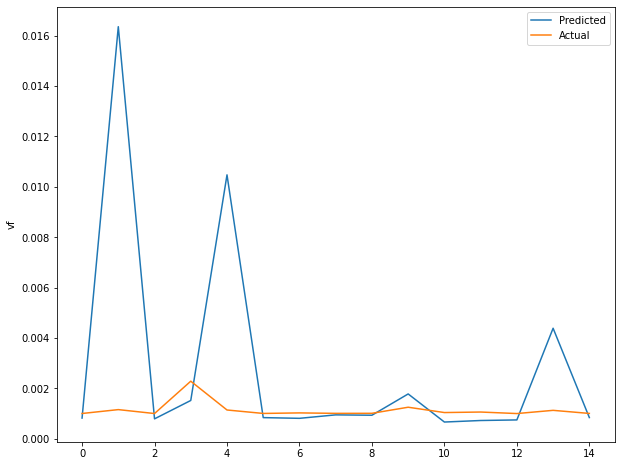

In [137]:
pred_results = pd.DataFrame({'y_test': y_test.values.flatten(), 'y_pred': y_pred.flatten()}, index=range(len(y_pred)))
print(pred_results.sample(10))
plt.figure(figsize=(10, 8))
plt.plot(y_pred, label='Predicted')
plt.plot(y_test.values, label='Actual')
plt.ylabel("vf")
plt.legend()
plt.show()

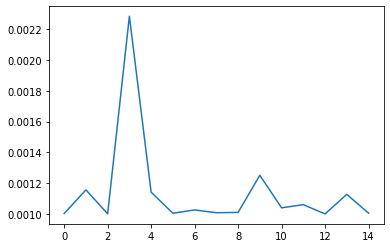

In [110]:
plt.plot(y_test.values, label='Actual')